## Car Max Data Analytics Problem

### Goal/Task:
Many customers decide to trade-in their current vehicle when purchasing a vehicle at CarMax.

What does a customer's appraised vehicle tell us about the vehicle they will end up purchasing?
How can CarMax use this information to improve business operations and provide customers a personalized shopping experience?

### How we plan to accomplish this:

Making a machine learning algorithm that can predit these trends between appraised vehicle and the one they end up purchasing

Present ways to add more data to this algoirthm to the business side



In [7]:
# Import the data
import pandas as pd
data = pd.read_csv("ShowcaseDataWinter2023.csv")

In [8]:
# Visualize the data
data.head()

,price,appraisal_offer,online_appraisal_flag,model_year,mileage,make,model,trim_descrip,body,color,...,trim_descrip_appraisal,body_appraisal,color_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market
0,$20k to $25k,$0k to $5k,1.0,2014.0,15k to 20k miles,HDT,HDT_12,Premium,E,Red,...,NaN,D,Silver,4.0L,6,17.0,21,236,21.0,13
1,$15k to $20k,$0k to $5k,0.0,2006.0,100k+ miles,KQZ,KQZ_23,Premium,E,Silver,...,Not Premium,D,Gold,4.2L,6,16.0,21,205,25.0,11
2,$30k to $35k,$35k to $40k,1.0,2014.0,5k to 10k miles,CZV,CZV_10,Premium,E,Black,...,NaN,E,Red,2.0L,4,41.0,38,181,10.0,13
3,$35k to $40k,$5k to $10k,1.0,2014.0,15k to 20k miles,IZA,IZA_19,Premium,F,Silver,...,Premium,F,Blue,3.0L,6,17.0,25,230,16.0,13
4,$30k to $35k,$15k to $20k,1.0,2011.0,35k to 40k miles,HDT,HDT_8,Premium,F,Blue,...,Not Premium,E,Black,2.4L,4,20.0,29,182,18.0,16


### Finding trends
Let's now try to find some trends. We can  compare some direct things such as the following:
- price & appraisal_offer
- model_year & model_year_appraisal
- mileage & mileage_appraisal (NEED TO CONVERT TO DOUBLE/FLOAT - IS A STRING)
- engine & engine_appraisal (is a string with L at the end but we could convert to a float)
- cylinders & cylinders_appraisal
- mpg_city & mpg_city_appraisal
- mgp_highway & mpg_highway_appraisal
- horsepower & horsepower_appraisal
- fuel_capacity & fuel_capacity_appraisal


Text(0, 0.5, 'Price of Purchased Viechle ($k)')

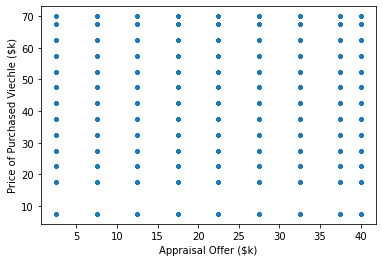

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

# price / offer
appraisal_offer = data["appraisal_offer"]
price = data["price"]

appraisal_offer=appraisal_offer.replace(to_replace="$0k to $5k",value="2.5")
appraisal_offer=appraisal_offer.replace(to_replace="$5k to $10k",value="7.5")
appraisal_offer=appraisal_offer.replace(to_replace="$0 to $15k",value="7.5")
appraisal_offer=appraisal_offer.replace(to_replace="$10k to $15k",value="12.5")
appraisal_offer=appraisal_offer.replace(to_replace="$15k to $20k",value="17.5")
appraisal_offer=appraisal_offer.replace(to_replace="$20k to $25k",value="22.5")
appraisal_offer=appraisal_offer.replace(to_replace="$25k to $30k",value="27.5")
appraisal_offer=appraisal_offer.replace(to_replace="$30k to $35k",value="32.5")
appraisal_offer=appraisal_offer.replace(to_replace="$35k to $40k",value="37.5")
appraisal_offer=appraisal_offer.replace(to_replace="$40k to $45k",value="42.5")
appraisal_offer=appraisal_offer.replace(to_replace="$45k to $50k",value="47.5")
appraisal_offer=appraisal_offer.replace(to_replace="$50k to $55k",value="52.5")
appraisal_offer=appraisal_offer.replace(to_replace="$55k to $60k",value="57.5")
appraisal_offer=appraisal_offer.replace(to_replace="$60k to $65k",value="62.5")
appraisal_offer=appraisal_offer.replace(to_replace="$65k to $70k",value="67.5")
appraisal_offer=appraisal_offer.replace(to_replace="$40k+",value="40")
appraisal_offer=appraisal_offer.replace(to_replace="$70k+",value="70")

price=price.replace(to_replace="$0k to $5k",value="2.5")
price=price.replace(to_replace="$0 to $15k",value="7.5")
price=price.replace(to_replace="$5k to $10k",value="7.5")
price=price.replace(to_replace="$10k to $15k",value="12.5")
price=price.replace(to_replace="$15k to $20k",value="17.5")
price=price.replace(to_replace="$20k to $25k",value="22.5")
price=price.replace(to_replace="$25k to $30k",value="27.5")
price=price.replace(to_replace="$30k to $35k",value="32.5")
price=price.replace(to_replace="$35k to $40k",value="37.5")
price=price.replace(to_replace="$40k to $45k",value="42.5")
price=price.replace(to_replace="$45k to $50k",value="47.5")
price=price.replace(to_replace="$50k to $55k",value="52.5")
price=price.replace(to_replace="$55k to $60k",value="57.5")
price=price.replace(to_replace="$60k to $65k",value="62.5")
price=price.replace(to_replace="$65k to $70k",value="67.5")
price=price.replace(to_replace="$40k+",value="40")
price=price.replace(to_replace="$70k+",value="70")

appraisal_offer = appraisal_offer.astype(float)
price = price.astype(float)

X_tr, X_te, y_tr, y_te = train_test_split(appraisal_offer, price, test_size=0.3, random_state=142)
plt.plot(X_tr,y_tr,'.')
plt.xlabel("Appraisal Offer ($k)")
plt.ylabel("Price of Purchased Viechle ($k)")

#plt.plot(p_test,a_test)

In [29]:
# cylinders
cylinders_appraisal = data["cylinders_appraisal"]
cylinders_appraisal=cylinders_appraisal.replace(to_replace="null",value="0")
cylinders_appraisal = cylinders_appraisal.astype(int)

cylinders = data["cylinders"]
cylinders=cylinders.replace(to_replace="null",value="0")
cylinders = cylinders.astype(int)



# horsepower
horsepower_appraisal = data["horsepower_appraisal"]
horsepower_appraisal=horsepower_appraisal.replace(to_replace="null",value="0")
horsepower_appraisal = horsepower_appraisal.astype(float)

horsepower = data["horsepower"]
horsepower=horsepower.replace(to_replace="null",value="0")
horsepower = horsepower.astype(float)

#  fuel_capacity
fuel_capacity_appraisal = data["fuel_capacity"]
fuel_capacity_appraisal = fuel_capacity_appraisal.replace(to_replace="null",value="0")
fuel_capacity_appraisal = fuel_capacity_appraisal.astype(float)

fuel_capacity = data["fuel_capacity"]
fuel_capacity = fuel_capacity.replace(to_replace="null",value="0")
fuel_capacity = fuel_capacity.astype(float)

In [13]:
# Let's try making an ANN 
# First we'll need to add in more data into the X
from sklearn.neural_network import MLPRegressor

appraisal_offer_np = appraisal_offer.to_numpy()

#print(appraisal_offer_np[1])
price_np = price.to_numpy()

cylinders_appraisal_np = price.to_numpy()

#X = np.array([appraisal_offer_np, cylinders_appraisal_np, horsepower_appraisal, fuel_capacity_appraisal])

n = len(cylinders_appraisal_np)

X = np.zeros([n,4])
Y = np.zeros([n,1])


for i in range(len(cylinders_appraisal)):
    X[i][0] = appraisal_offer_np[i]
    X[i][1] = cylinders_appraisal_np[i]
    X[i][2] = horsepower_appraisal[i]
    X[i][3] = fuel_capacity_appraisal[i]
    Y[i] = price_np[i]

Y = Y[:,0]

X[14650,3] = 0
X[ 28503,3] = 0
X[ 37101,3] = 0 
X[142763,3] = 0

In [22]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=445)

# MLP Regression
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
#regr.predict(X_test[:2])


## Testing out 2D Y Matrix
Now, I'd like to see if I can get this MLP Regressor to have a 2D Y matrix so I can begin to predit the price AND other values

In [36]:
price_np = price.to_numpy()
cylinder_np = cylinders.to_numpy()
horsepower_np = horsepower.to_numpy()
fuel_capacity_np = fuel_capacity.to_numpy()

Y = np.zeros([n,4])


for i in range(len(cylinders_appraisal)):
    Y[i][0] = price_np[i]
    Y[i][1] = cylinder_np[i]
    Y[i][2] = horsepower_np[i]
    Y[i][3] = fuel_capacity_np[i]

Y[14650,3] = 0
Y[28503,3] = 0
Y[37101,3] = 0
Y[142763,3] = 0


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
#test train split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=445)

In [47]:
# trying more things !!

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# model building
clf = MultiOutputRegressor(RandomForestRegressor(max_depth=2, random_state=0))
clf.fit(X_train, y_train)

In [ ]:
# scoring and prediction
print(clf.predict(X_test[[0]]))
clf.score(X_test, y_test, sample_weight=None)

## Things that haven't worked
Just me attempting the 2D things again but it not workign

In [45]:
# KNN Model testing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
# define model
model_KNN = KNeighborsRegressor()
# fit model
model_KNN.fit(X, Y)
print(accuracy_score(y_train, y_test))

KNeighborsRegressor()

In [43]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [44]:
# MLP Regression
reg = MLPRegressor(hidden_layer_sizes=(34,34,34),activation="relu" ,random_state=1, max_iter=200).fit(X_trainscaled, y_train)

/Users/victoria/opt/anaconda3/envs/cse217a/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
y_pred=reg.predict(X_testscaled)
print('The Score with', (r2_score(y_pred, y_test)))

#regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
#regr.predict(X_test[:2])

## Bar Plot attempting
This is me trying to make a bar plot to visualize average cost at each market

In [214]:
market = data["market"]
type(market)
import seaborn as sns

0         appraisal
1         appraisal
2         appraisal
3         appraisal
4         appraisal
            ...    
199995    appraisal
199996    appraisal
199997    appraisal
199998    appraisal
199999    appraisal
Name: appraisal_offer, Length: 200000, dtype: object


In [ ]:
# Engine
engine = data["engine"]
engine_appraisal = data["engine_appraisal"]

# take out the L by deleting the last character then make that value a float
for i in range(len(engine)):
    engine[i] = engine[i].strip("L")
    engine_appraisal[i] = engine_appraisal[i].strip("L")

engine = engine.astype(float)
engine_appraisal = engine_appraisal.astype(float)

In [219]:
# while I'm waiting on internet to work, let's do some simple price vs market graphs

market = data["market"]


# In order to put in the values we want, well need a dataFrame that looks as the following:
''' 
  market |           type                 |  amount
   #      appraisal or price                 #
'''

# these are becoming pointers, not just duplicating the size
apprisal_name = appraisal_offer # just make it empty -> should change to an emtpy thing once I can google it
price_name = apprisal_name
print(appraisal_offer)
for i in range(len(apprisal_name)):
    apprisal_name[i] = "appraisal"
    price_name[i] = "price"
    apprisal_name[i] = "appraisal"

price_combined = pd.concat([price_name,price,market],axis = 1)
appraisal_combined = pd.concat([apprisal_name,appraisal_offer,market],axis = 1)

print(appraisal_combined)


# I want them to stack - ill need to rename the price/apprisal_offer headers so that they can combine
# this probalby won't be a problem once we change apprisal_offer back into a long, not a strong 
bar_data = pd.concat([price_combined,appraisal_combined],axis = 1)

#print(bar_data)


'''

bar_data_graph = bar_data[['appraisal_offer', 'price','market']]\
    .groupby(['market'], as_index=False)\
    .aggregate('mean')


sns.barplot(x = "source", y = "price", hue = "name", data =  bar_data)
plt.xticks(rotation=30)
plt.title("Source vs Average Price for Expensive Vehicles")
plt.xlabel("Source")
plt.ylabel("Average Price ($)")
'''


0          2.5
1          2.5
2         37.5
3          7.5
4         17.5
          ... 
199995    17.5
199996    12.5
199997     2.5
199998    12.5
199999    17.5
Name: appraisal_offer, Length: 200000, dtype: float64
       appraisal_offer appraisal_offer  market
0            appraisal       appraisal      13
1            appraisal       appraisal      11
2            appraisal       appraisal      13
3            appraisal       appraisal      13
4            appraisal       appraisal      16
...                ...             ...     ...
199995       appraisal       appraisal       1
199996       appraisal       appraisal       8
199997       appraisal       appraisal       3
199998       appraisal       appraisal      11
199999       appraisal       appraisal      14

[200000 rows x 3 columns]


'\n\nbar_data_graph = bar_data[[\'appraisal_offer\', \'price\',\'market\']]    .groupby([\'market\'], as_index=False)    .aggregate(\'mean\')\n\n\nsns.barplot(x = "source", y = "price", hue = "name", data =  bar_data)\nplt.xticks(rotation=30)\nplt.title("Source vs Average Price for Expensive Vehicles")\nplt.xlabel("Source")\nplt.ylabel("Average Price ($)")\n'

In [ ]:
## How to get rid of null values!!

# id_NaN = data['price'].notnull()
# data = data[id_NaN]